<a href="https://colab.research.google.com/github/Amal-jama/Good-Days-Project/blob/master/credit_risk_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING ALL NECCESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

LOAD DATASET


In [ ]:
credit_data_1 = pd.read_csv('/content/test_data.csv')
credit_data_2 = pd.read_csv('/content/train_data.csv')
credit_data_1.head(10)

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0
5,5029195,F,N,Y,0,94500.0,Working,Secondary / secondary special,Married,House / apartment,-18131,-617,1,0,0,0,Laborers,2.0,-18.0,0
6,5029213,F,N,Y,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22115,365243,1,0,1,0,NaN,2.0,-23.0,0
7,5051050,M,Y,N,0,67500.0,Working,Secondary / secondary special,Married,House / apartment,-22407,-2174,1,0,0,0,Laborers,2.0,-9.0,0
8,5061569,F,N,N,0,189000.0,Working,Secondary / secondary special,Married,Municipal apartment,-18452,-137,1,0,0,0,Laborers,2.0,-37.0,0
9,5091430,F,N,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16202,-2939,1,1,1,0,Managers,2.0,-43.0,0


In [ ]:
credit_data_2.head(10)

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0
5,5100411,F,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-13251,-3839,1,1,0,0,Accountants,2.0,-1.0,0
6,5022817,M,Y,Y,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-17262,-1617,1,0,0,0,Core staff,2.0,-16.0,0
7,5009811,F,N,N,1,202500.0,Working,Secondary / secondary special,Married,House / apartment,-11813,-3266,1,1,1,0,Sales staff,3.0,-21.0,0
8,5113922,F,N,N,0,90000.0,Pensioner,Secondary / secondary special,Single / not married,Municipal apartment,-23478,365243,1,0,0,0,NaN,1.0,-50.0,0
9,5021541,F,Y,N,1,306000.0,Working,Higher education,Married,House / apartment,-9310,-1678,1,0,0,0,NaN,3.0,-13.0,0


*The dataset contains these variables:ID	Gender	Has a car	Has a property	Children count	Income	Employment status	Education level	Marital status	Dwelling	Age	Employment length	Has a mobile phone	Has a work phone	Has a phone	Has an email	Job title	Family member count	Account age	Is high risk*


*Both datasets are identical*

PRE-PROCESSING DATA

*Removing irrelevant features,handle missing values*

In [ ]:
# Checking for null values
credit_data_1.isnull()


,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
7288,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7289,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
7290,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#dropping null values in row
credit_data_1.dropna(inplace=True)

In [ ]:
#dropping duplicates
credit_data_1.drop_duplicates(inplace=True)
print(credit_data_1)

           ID Gender Has a car Has a property  Children count    Income  \
0     5091261      F         N              Y               0  202500.0   
1     5096963      M         Y              N               0  675000.0   
2     5087880      F         N              N               0  234000.0   
3     5021949      F         Y              Y               0  445500.0   
4     5105705      F         Y              N               0  225000.0   
...       ...    ...       ...            ...             ...       ...   
7282  5105673      F         N              N               1  135000.0   
7283  5065795      M         Y              Y               0  315000.0   
7285  5088665      M         Y              Y               0  225000.0   
7288  5068826      F         Y              Y               0  157500.0   
7290  5142701      F         Y              N               0   95850.0   

         Employment status                Education level  \
0            State servant  Secondary 

In [ ]:
#Data Manipulation
credit_data_1.describe

<bound method NDFrame.describe of            ID Gender Has a car Has a property  Children count    Income  \
0     5091261      F         N              Y               0  202500.0   
1     5096963      M         Y              N               0  675000.0   
2     5087880      F         N              N               0  234000.0   
3     5021949      F         Y              Y               0  445500.0   
4     5105705      F         Y              N               0  225000.0   
...       ...    ...       ...            ...             ...       ...   
7282  5105673      F         N              N               1  135000.0   
7283  5065795      M         Y              Y               0  315000.0   
7285  5088665      M         Y              Y               0  225000.0   
7288  5068826      F         Y              Y               0  157500.0   
7290  5142701      F         Y              N               0   95850.0   

         Employment status                Education level  \
0            State servant  Secondary / secondary special   
1     Commercial associate               Higher education   
2            State servant               Higher education   
3     Commercial associate               Higher education   
4                  Working  Secondary / secondary special   
...                    ...                            ...   
7282               Working               Higher education   
7283               Working  Secondary / secondary special   
7285  Commercial associate               Higher education   
7288               Working               Higher education   
7290  Commercial associate  Secondary / secondary special   

            Marital status             Dwelling    Age  Employment length  \
0                Separated    House / apartment -16834              -1692   
1                  Married    House / apartment -18126               -948   
2           Civil marriage    House / apartment -21967              -5215   
3                  Married    House / apartment -12477               -456   
4                  Married  Municipal apartment -12155               -667   
...                    ...                  ...    ...                ...   
7282               Married         With parents -10263               -583   
7283  Single / not married    House / apartment -12912              -3403   
7285  Single / not married    House / apartment  -9220              -1473   
7288               Married    House / apartment -14976              -3550   
7290               Married    House / apartment -18931              -6678   

      Has a mobile phone  Has a work phone  Has a phone  Has an email  \
0                      1                 0            0             0   
1                      1                 0            1             0   
2                      1                 0            0             1   
3                      1                 0            0             0   
4                      1                 0            0             0   
...                  ...               ...          ...           ...   
7282                   1                 0            0             0   
7283                   1                 0            0             1   
7285                   1                 0            0             0   
7288                   1                 0            0             1   
7290                   1                 1            0             0   

           Job title  Family member count  Account age  Is high risk  
0     Medicine staff                  1.0         -6.0             0  
1           Managers                  2.0        -16.0             0  
2         Core staff                  2.0        -52.0             0  
3           Managers                  2.0        -54.0             0  
4           Laborers                  2.0        -48.0             0  
...              ...                  ...          ...           ...  
7282     Secretaries             

In [ ]:
credit_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4996 entries, 0 to 7290
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4996 non-null   int64  
 1   Gender               4996 non-null   object 
 2   Has a car            4996 non-null   object 
 3   Has a property       4996 non-null   object 
 4   Children count       4996 non-null   int64  
 5   Income               4996 non-null   float64
 6   Employment status    4996 non-null   object 
 7   Education level      4996 non-null   object 
 8   Marital status       4996 non-null   object 
 9   Dwelling             4996 non-null   object 
 10  Age                  4996 non-null   int64  
 11  Employment length    4996 non-null   int64  
 12  Has a mobile phone   4996 non-null   int64  
 13  Has a work phone     4996 non-null   int64  
 14  Has a phone          4996 non-null   int64  
 15  Has an email         4996 non-null   int64 

In [ ]:
#Data Type Corrections
# Convert categorical variables to category dtype
categorical_columns = ['Gender', 'Has a car', 'Has a property', 'Employment status',
                       'Education level', 'Marital status', 'Dwelling', 'Job title']

for column in categorical_columns:
    credit_data_1[column] = credit_data_1[column].astype('category')

# Apply one-hot encoding to categorical variables
credit_data_1 = pd.get_dummies(credit_data_1, columns=categorical_columns, drop_first=True)

# Check updated data types and the presence of new columns
print("\nUpdated Data Types:\n", credit_data_1.dtypes)
print("\nFirst Few Rows of Updated DataFrame:\n", credit_data_1.head())


Updated Data Types:
 ID                                                 int64
Children count                                     int64
Income                                           float64
Age                                                int64
Employment length                                  int64
Has a mobile phone                                 int64
Has a work phone                                   int64
Has a phone                                        int64
Has an email                                       int64
Family member count                              float64
Account age                                      float64
Is high risk                                       int64
Gender_M                                            bool
Has a car_Y                                         bool
Has a property_Y                                    bool
Employment status_Pensioner                         bool
Employment status_State servant                     bool
Employmen

EXPLORATIVE DATASET ANALYSIS

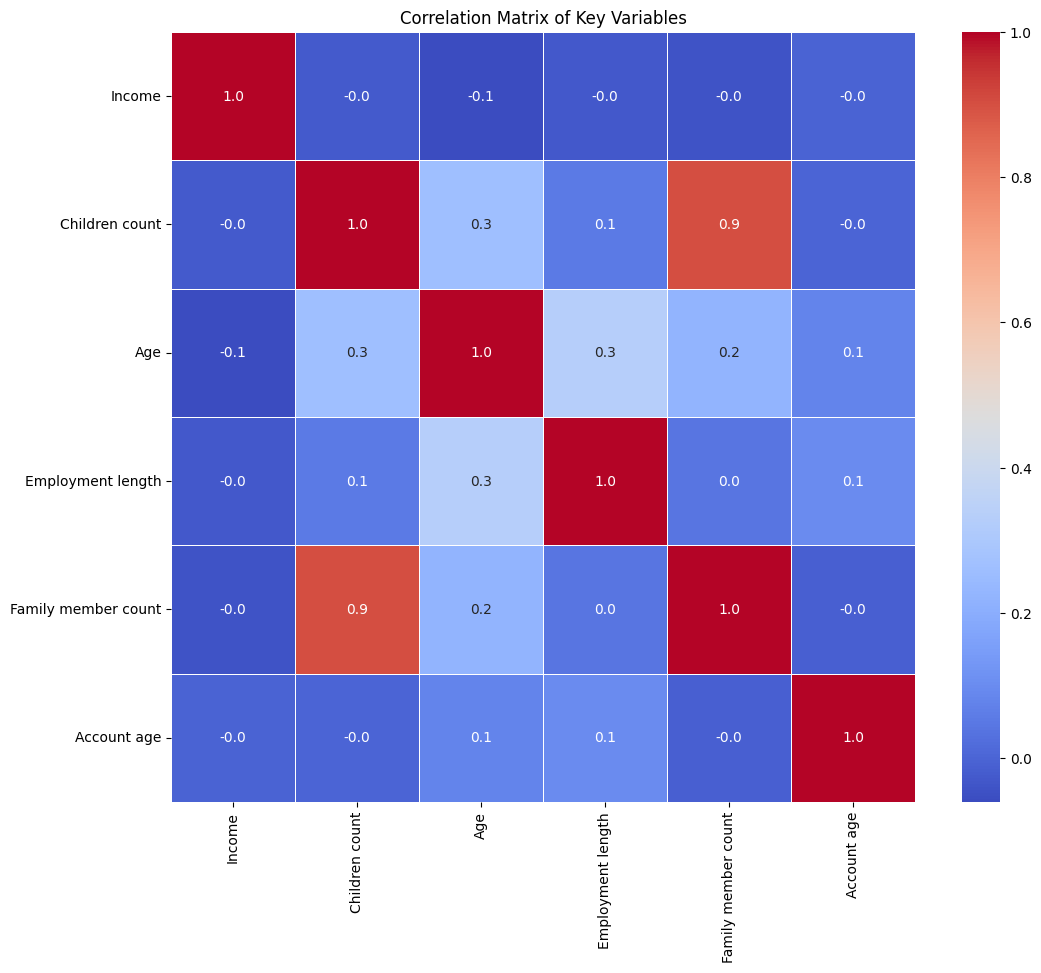

In [ ]:
# Visualization and Correlation Analysis

important_features = ['Income', 'Children count', 'Age', 'Employment length',
                      'Family member count', 'Account age']

# Subset the dataframe
correlation_data = credit_data_1[important_features]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Correlation Matrix of Key Variables')
plt.show()


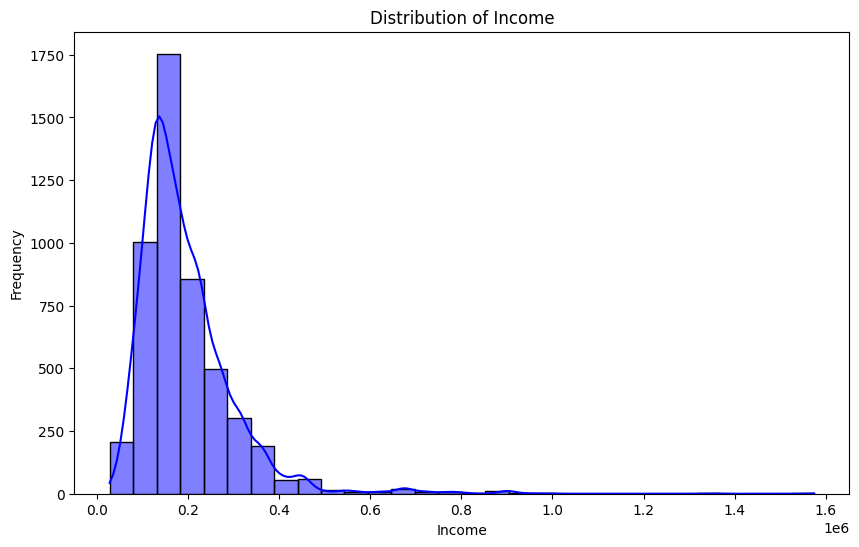

<ipython-input-16-89e84008dbdf>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(credit_data_1.loc[low_risk_mask, 'Income'], label='Low Risk', shade=True)
<ipython-input-16-89e84008dbdf>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(credit_data_1.loc[high_risk_mask, 'Income'], label='High Risk', shade=True)


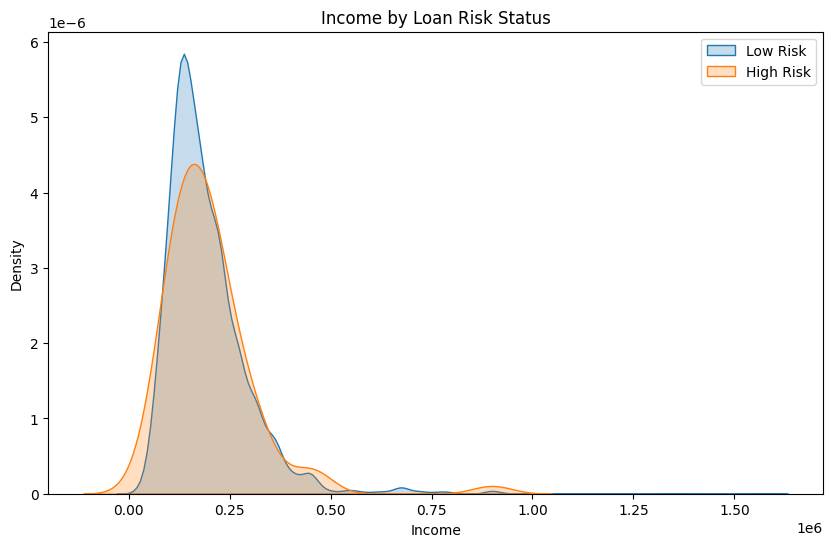

In [ ]:
# Check if 'Income' and 'Age' columns are present
if 'Income' in credit_data_1.columns and 'Age' in credit_data_1.columns:
    # Plotting distribution of Income
    plt.figure(figsize=(10, 6))
    sns.histplot(credit_data_1['Income'], bins=30, color='blue', kde=True)
    plt.title('Distribution of Income')
    plt.xlabel('Income')
    plt.ylabel('Frequency')
    plt.show()

    # Check if 'loan_status' column is present
    if 'Is high risk' in credit_data_1.columns:
        # Plotting Income by loan status (high risk vs low risk)
        high_risk_mask = credit_data_1['Is high risk'] == 1
        low_risk_mask = credit_data_1['Is high risk'] == 0

        plt.figure(figsize=(10, 6))
        sns.kdeplot(credit_data_1.loc[low_risk_mask, 'Income'], label='Low Risk', shade=True)
        sns.kdeplot(credit_data_1.loc[high_risk_mask, 'Income'], label='High Risk', shade=True)
        plt.title('Income by Loan Risk Status')
        plt.xlabel('Income')
        plt.ylabel('Density')
        plt.legend()
        plt.show()
    else:
        print("The 'Is high risk' column is not available in the dataset.")
else:
    print("Income or Age columns are not available in the dataset.")

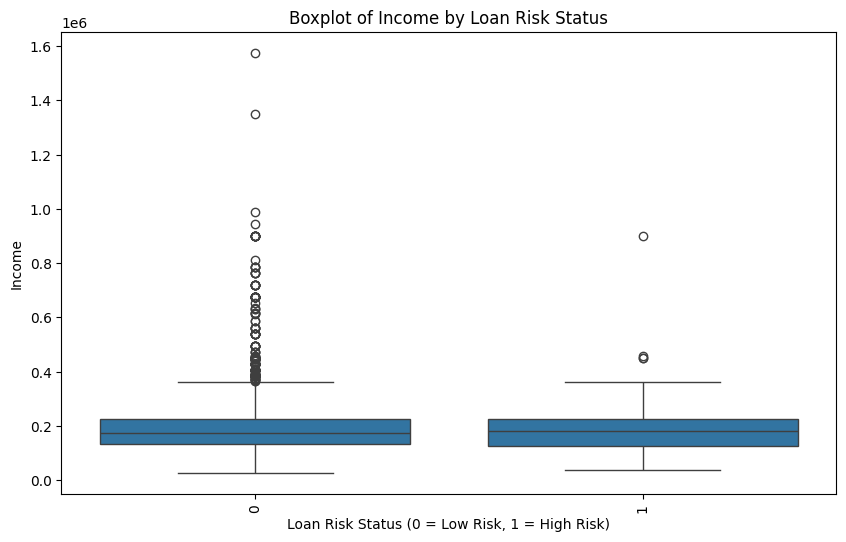

In [ ]:
if 'Is high risk' in credit_data_1.columns and 'Income' in credit_data_1.columns:
    # Create a boxplot for 'Income' by loan risk status
    try:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Is high risk', y='Income', data=credit_data_1)
        plt.title('Boxplot of Income by Loan Risk Status')
        plt.xlabel('Loan Risk Status (0 = Low Risk, 1 = High Risk)')
        plt.ylabel('Income')
        plt.xticks(rotation=90)
        plt.show()
    except Exception as e:
        print(f"An error occurred during plotting: {e}")
else:
    print("The required columns 'Is high risk' or 'Income' are not available in the dataset.")

In [ ]:
 # Calculate summary statistics for 'Income' by loan risk status
income_stats_by_status = credit_data_1.groupby('Is high risk')['Income'].describe()
print(income_stats_by_status)

               count           mean            std      min       25%  \
Is high risk                                                            
0             4918.0  193869.791480  105497.066262  27000.0  135000.0   
1               78.0  198403.846154  118348.046519  36000.0  127125.0   

                   50%       75%        max  
Is high risk                                 
0             172255.5  225000.0  1575000.0  
1             180000.0  225000.0   900000.0  


FEATURE SELECTION



In [ ]:

# Convert loan_status to a binary outcome for feature selection (1 for High Risk, 0 for Low Risk)
credit_data_1['loan_status_binary'] = credit_data_1['Is high risk'].apply(lambda x: 1 if x == 1 else 0)

# Selecting features for the model
features = credit_data_1.select_dtypes(include=[np.number]).columns.tolist()
features.remove('loan_status_binary')

# Prepare the features and target variable
X = credit_data_1[features]
y = credit_data_1['loan_status_binary']

# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Apply imputer to our feature set: impute missing values with the median of each column
X_imputed = imputer.fit_transform(X)

# Fitting a Random Forest to assess feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_imputed, y)

# Get feature importances from the random forest model
feature_importances = rf.feature_importances_

# Create a DataFrame to view the features and their importances
features_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top 20 important features
top_20_features = features_importance_df.head(20)
print(top_20_features)




                Feature  Importance
11         Is high risk    0.876832
4     Employment length    0.028816
0                    ID    0.026495
3                   Age    0.023671
10          Account age    0.015870
2                Income    0.014393
9   Family member count    0.004749
1        Children count    0.003590
8          Has an email    0.002066
6      Has a work phone    0.001864
7           Has a phone    0.001654
5    Has a mobile phone    0.000000
(3996, 12) (1000, 12) (3996,) (1000,)


In [ ]:
# Data splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Scaling the features: StandardScaler is generally a good default scaler for many ML models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the final size of the training and test sets
print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)

(3996, 12) (1000, 12) (3996,) (1000,)


MODELLING

In [ ]:
# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
# Train Logistic Regression
log_reg.fit(X_train_scaled, y_train)
# Predict on testing data
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_proba_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_pred_proba_log_reg)


In [ ]:
svm_classifier = SVC(probability=True, random_state=42)
svm_classifier.fit(X_train_scaled, y_train)
y_pred_svm = svm_classifier.predict(X_test_scaled)
y_pred_proba_svm = svm_classifier.predict_proba(X_test_scaled)[:, 1]
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)

In [ ]:
# Initialize k-Nearest Neighbors with k=5
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)
y_pred_knn = knn_classifier.predict(X_test_scaled)
y_pred_proba_knn = knn_classifier.predict_proba(X_test_scaled)[:, 1]
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

In [ ]:
# Initialize Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)
y_pred_dt = dt_classifier.predict(X_test_scaled)
y_pred_proba_dt = dt_classifier.predict_proba(X_test_scaled)[:, 1]
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

<ipython-input-35-3172fd05f46b>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=metrics_df, ax=axes[0, 0], palette='viridis')
<ipython-input-35-3172fd05f46b>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision', data=metrics_df, ax=axes[0, 1], palette='viridis')
<ipython-input-35-3172fd05f46b>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall', data=metrics_df, ax=axes[0, 2], palette='viridis')
<ipython-input-35-3172fd05f46b>:36: FutureWarning: 

Passing `palette` wit

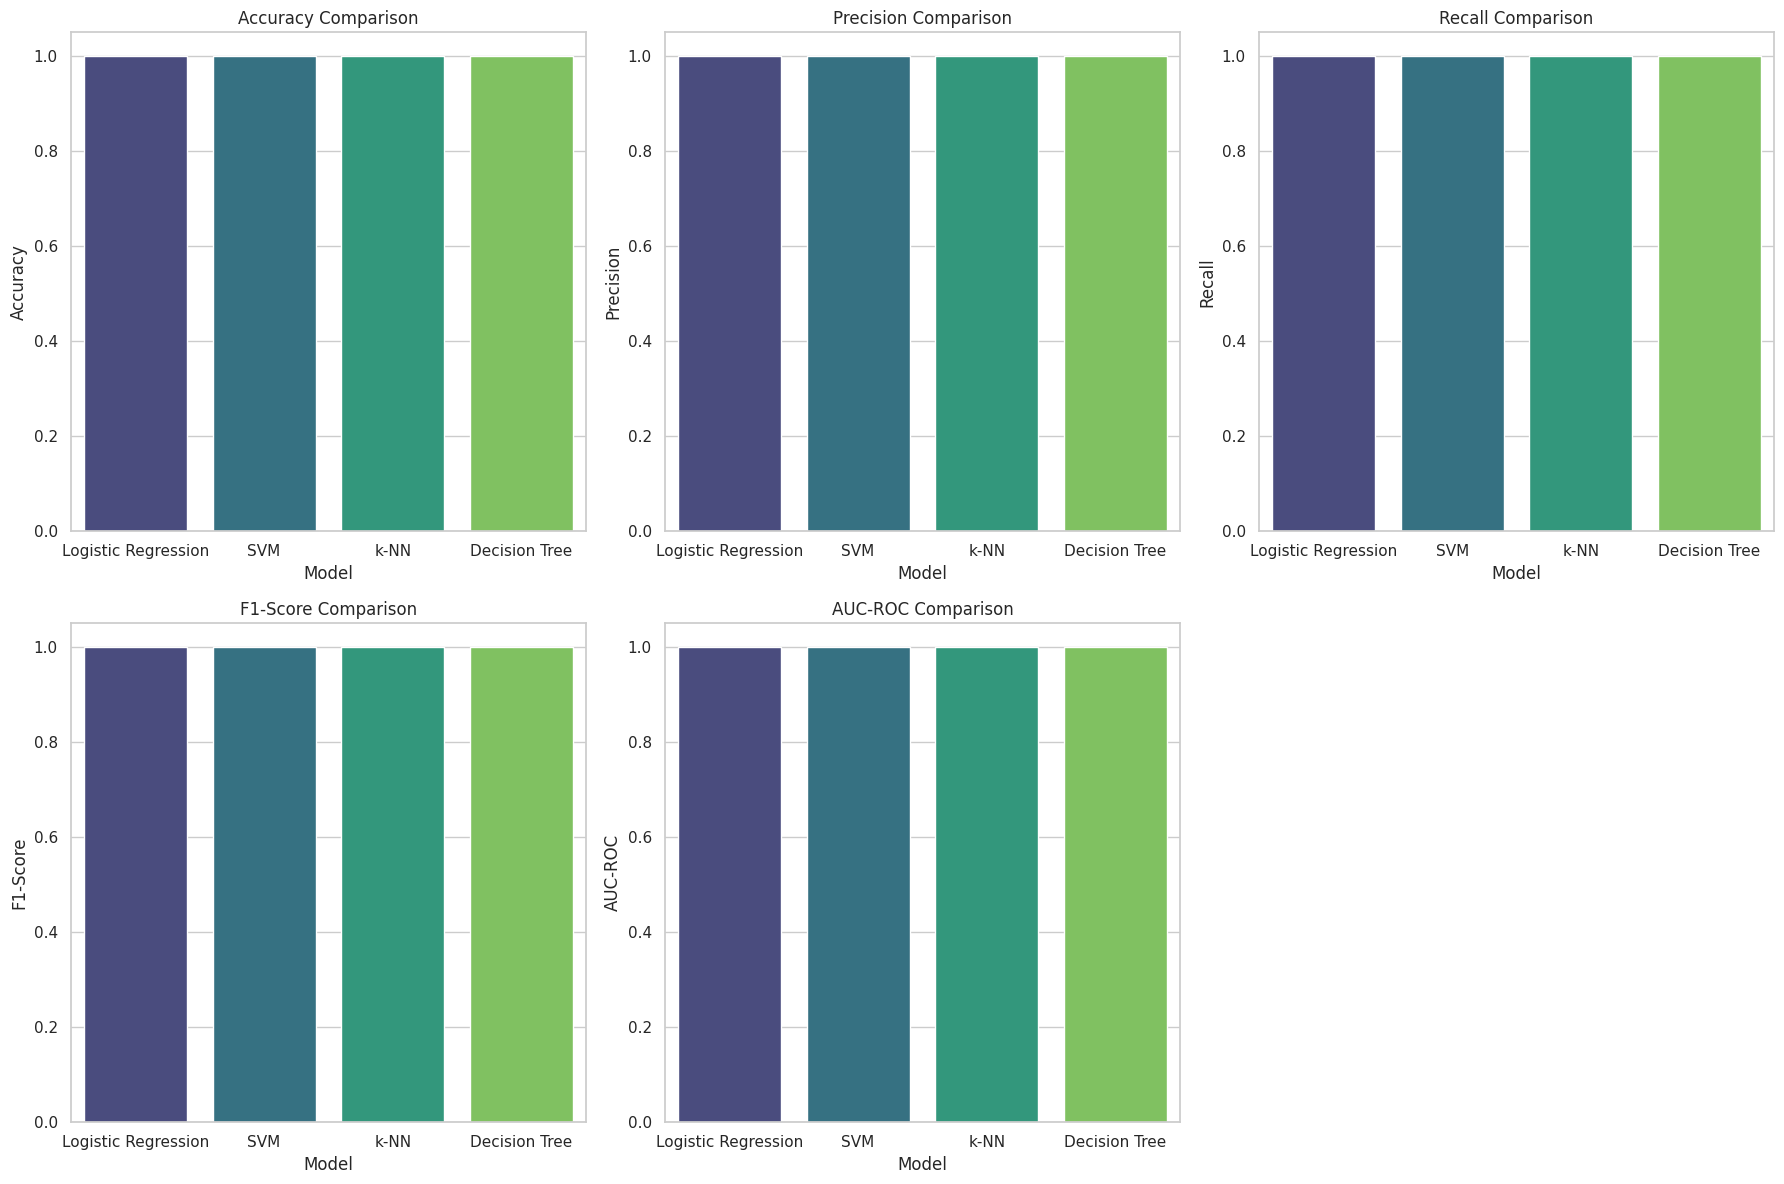

In [ ]:
# Combine the metrics for all models into a single DataFrame
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'k-NN', 'Decision Tree'],
    'Accuracy': [accuracy_log_reg, accuracy_svm,accuracy_knn, accuracy_dt],
    'Precision': [precision_log_reg, precision_svm,precision_knn, precision_dt],
    'Recall': [recall_log_reg, recall_svm,recall_knn, recall_dt],
    'F1-Score': [f1_log_reg, f1_svm, f1_knn, f1_dt],
    'AUC-ROC': [roc_auc_log_reg, roc_auc_svm,roc_auc_knn, roc_auc_dt]
})

# Setting up the plot aesthetics
sns.set(style="whitegrid")

# Plotting bar charts for each metric
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot Accuracy
sns.barplot(x='Model', y='Accuracy', data=metrics_df, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_xlabel('Model')
axes[0, 0].set_ylabel('Accuracy')

# Plot Precision
sns.barplot(x='Model', y='Precision', data=metrics_df, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Precision Comparison')
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('Precision')

# Plot Recall
sns.barplot(x='Model', y='Recall', data=metrics_df, ax=axes[0, 2], palette='viridis')
axes[0, 2].set_title('Recall Comparison')
axes[0, 2].set_xlabel('Model')
axes[0, 2].set_ylabel('Recall')

# Plot F1-Score
sns.barplot(x='Model', y='F1-Score', data=metrics_df, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('F1-Score Comparison')
axes[1, 0].set_xlabel('Model')
axes[1, 0].set_ylabel('F1-Score')

# Plot AUC-ROC
sns.barplot(x='Model', y='AUC-ROC', data=metrics_df, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('AUC-ROC Comparison')
axes[1, 1].set_xlabel('Model')
axes[1, 1].set_ylabel('AUC-ROC')

# Remove the empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()